# Challenge 1

In this lab you will partner with another student to conduct **[pair programming](https://en.wikipedia.org/wiki/Pair_programming)**. In the next 60 minutes there will be 2 coding sessions of 30 minutes each. In each sessoin, one student will be the **driver** to write the code to solve the problem while the other student will be the **observer** to watch and review. There will be several iterations of your code because the observer will help the driver review the codes and make improvements until the 15 minute session ends. After the coding session ends, the driver and observer will switch roles.

#### Import all the libraries that are necessary

In [117]:
# import libraries here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preparation

#### Import the `Fitbit2.csv` file and name your dataset `fitbit`

In [118]:
fitbit = pd.read_csv('data/Fitbit2.csv')
fitbit.sample(10)

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
318,2016-03-20,2731,6754,5.02,1,564.000,315,0,0,1237,...,3.119282,Sunday,6.0,0,6.383333,89.695550,7.250000,89.876033,March,3
274,2016-02-05,311,10434,7.75,13,718.000,243,42,29,1544,...,4.815625,Friday,4.0,1,6.683333,95.476190,7.066667,89.640592,February,2
326,2016-03-28,179,0,0.00,0,1.440,0,0,0,0,...,0.000000,Monday,0.0,1,0.000000,0.000000,7.616667,89.257812,March,3
283,2016-02-14,3289,14183,10.54,13,617.000,374,45,12,1941,...,6.549250,Sunday,6.0,0,4.400000,90.102389,7.466667,89.065606,February,2
119,2015-09-04,3518,15627,11.61,26,606.000,284,50,55,2063,...,7.214117,Friday,4.0,1,0.866667,75.362319,3.900000,93.600000,September,9
153,2015-10-08,2767,7865,5.84,15,1.118,204,32,13,1178,...,3.628807,Thursday,3.0,1,0.000000,0.000000,7.183333,91.702128,October,10
103,2015-08-19,3217,12213,9.07,6,421.000,381,13,8,1834,...,5.635835,Wednesday,2.0,1,3.650000,92.405063,4.383333,88.552189,August,8
52,2015-06-29,3142,12586,9.35,19,735.000,234,35,49,1579,...,5.809819,Monday,0.0,1,5.950000,90.379747,7.483333,93.541667,June,6
156,2015-10-11,2509,5216,3.88,1,1.243,175,17,5,8780,...,2.410919,Sunday,6.0,0,6.616667,85.745140,1.300000,96.296296,October,10
282,2016-02-13,3235,13907,10.36,0,551.000,357,15,15,1813,...,6.437404,Saturday,5.0,0,7.466667,89.065606,5.366667,92.528736,February,2


## Coding Session I - 30 minutes

From the Fitbit data, we want to visually understand: 

1. **How the average number of steps change by month. Use the appropriate visualization to show the median steps by month?**

Hints:
- Use `Months_encoded` column
- Use `pd` method `.groupby` to obtain your plottable data
- Use `pd` method `.plot`

2. **How the sleeping efficiency distributes. Use the appropriate visualization to show the median steps by month?**

Excluding days when `Yesterday_sleep` is 0, we would like to understand:
 - How the sleeping efficiency distributes. Plot a distribution, plus a vertical line with the mean.
 - How the sleeping efficiency distributes on Weekdays vs Workdays. Plot both distributions toguether.

Hints:
- Use `Yesterday_sleep_efficiency` column, among others.
- Use `sns` function `.hist` to plot your continuous data.
- Use `plt` function `.axvline` to plot the mean.
- Use `hue` parameter to distinguish between Workday and Weekend.
- Save your figures.

Ejercicio 1

In [119]:
# Driver 1 enter codes here
%matplotlib notebook
grouped = fitbit["Steps"].groupby(fitbit["Months_encoded"]).median().plot()
plt.xlabel("Months")
plt.ylabel("Steps")

<IPython.core.display.Javascript object>

Text(0, 0.5, 'Steps')

Los pasos tienen un comportamiento estacional: en primavera y verano (de marzo a septiembre), cuando las temperaturas son más altas (suponiendo que estamos en el hemisferio norte), el número de pasos es significativamente mayor (mayor que 11000) que de septiembre a marzo. 


Ejercicio 2 

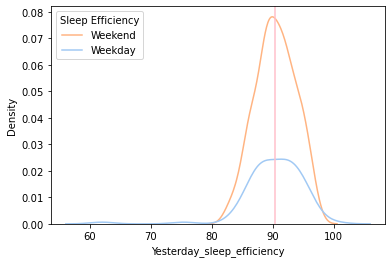

In [120]:
%matplotlib inline
fitbit_ = fitbit[fitbit["Yesterday_sleep"] != 0]
plot = sns.kdeplot(x=fitbit_.Yesterday_sleep_efficiency, hue=fitbit_.Work_or_Weekend, palette="pastel")
plot.axvline(x=fitbit_.Yesterday_sleep_efficiency.mean(), c="pink", label="mean")

plt.legend(title='Sleep Efficiency', loc='upper left', labels=['Weekend', 'Weekday'])

La eficiencia de sueño suele estar entre el 80 y el 100% con media en el 90%, siendo menor los fines de semana.

In [121]:
fitbit_

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
1,2015-05-09,3631,18925,14.11,4,611.0,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.0,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.0,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.0,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
5,2015-05-13,276,779,5.79,15,726.0,172,34,18,1094,...,3.597738,Wednesday,2.0,1,6.750000,88.621444,6.783333,82.892057,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.0,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.0,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.0,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.0,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


In [122]:
grouped.figure.savefig("Steps_Months.svg")

In [123]:
plot.figure.savefig("sleep_efficiency.svg")

## Coding Session II - 30 minutes

**Draw 4 scatter plots (2 rows and 2 columns) of the following features. Include some interesting legend and some interesting text**.

 - `Minutes Lightly Active`  vs `Steps`
 - `Minutes Very Active` vs `Steps`
 - `Minutes Sedentary` vs `Steps`
 - `Minutes Sedentary` vs `Minutes Very Active`
 
Hints:
 - Use `plt.subplots`
 - Use `ax.annotate`
 - Use `ax.legend` and `label` parameter

Text(50, 120, 'No correlation')

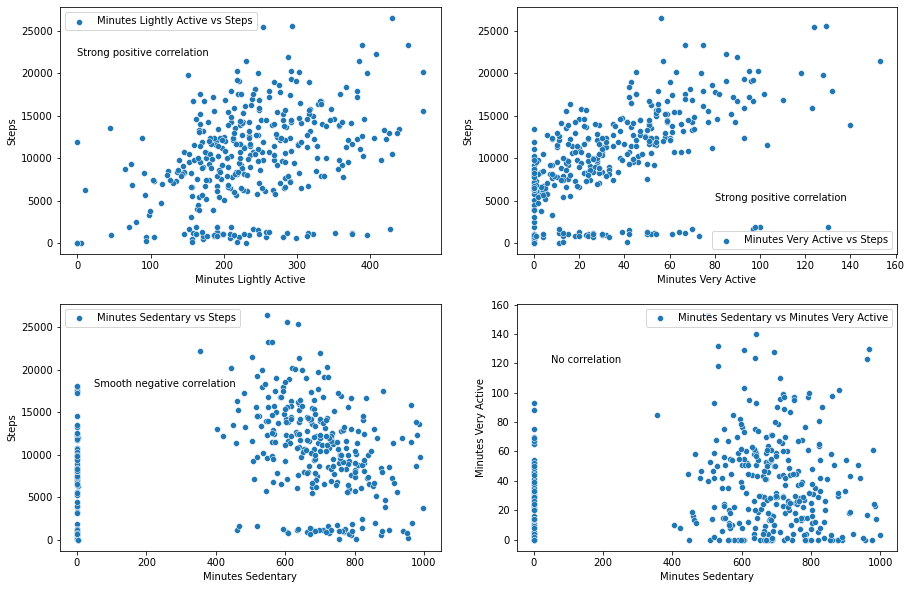

In [124]:
# Driver 2 enter codes here
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
plot1 = sns.scatterplot(x = fitbit["Minutes Lightly Active"], y = fitbit.Steps, ax=axs[0, 0],label = "Minutes Lightly Active vs Steps")
plot2 = sns.scatterplot(x = fitbit["Minutes Very Active"], y = fitbit.Steps, ax=axs[0, 1],label="Minutes Very Active vs Steps")
plot3 = sns.scatterplot(x = fitbit["Minutes Sedentary"], y = fitbit.Steps, ax=axs[1, 0],label="Minutes Sedentary vs Steps")
plot4 = sns.scatterplot(x = fitbit["Minutes Sedentary"], y = fitbit["Minutes Very Active"], ax=axs[1, 1],label = "Minutes Sedentary vs Minutes Very Active")
plot1.legend()
plot2.legend()
plot3.legend()
plot4.legend()
plot1.annotate("Strong positive correlation", xy=(0, 22000))
plot2.annotate("Strong positive correlation", xy=(80,5000))
plot3.annotate("Smooth negative correlation", xy=(50,18000))
plot4.annotate("No correlation", xy=(50,120))